In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from clean import clean_dataset

In [2]:
data = pd.read_csv("dataset/heart_2022_with_nans.csv")

In [3]:
print("Initial data shape: ", data.shape)

Initial data shape:  (445132, 40)


In [4]:
numerical_columns = data.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


In [5]:
def sns_plot(numeric_list, data, type):
    features = [col for col in numeric_list if col != 'GeneralHealth']

    n_features = len(features)
    n_cols = 4  # Number of columns in the grid
    n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows required

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(56, 5 * n_rows))
    axes = axes.flatten()

    # Loop over the features and create plots
    if type=="box":
        for i, feature in enumerate(features):
            sns.boxplot(ax=axes[i], x="GeneralHealth", y=feature, data=data, palette="Set2")
            axes[i].set_title(f"{feature} vs General Health")
        for j in range(i+1,len(axes)):
            fig.delaxes(axes[j])
    elif type=="violin":
        for i, feature in enumerate(features):
            sns.violinplot(ax=axes[i], x="GeneralHealth", y=feature, data=data, palette="Set2")
        for j in range(i+1,len(axes)):
            fig.delaxes(axes[j])
    elif type=="histogram":
        for i, feature in enumerate(features):
            sns.histplot(ax=axes[i], x=feature, data=data, hue="GeneralHealth", palette="Set2", kde=True)
            axes[i].set_title(f"{feature} vs General Health")
        for j in range(i+1,len(axes)):
            fig.delaxes(axes[j])
    elif type=="correlation":
        sns.heatmap(data[features].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0])
        axes[0].set_title("Correlation Matrix")
        i=0
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
    # elif type=="qq":
    #     for i, feature in enumerate(features):
    #         sns.qqplot(data[feature], line='s', ax=axes[i])
    #         axes[i].set_title(f"{feature} vs General Health")
        # for j in range(i+1, len(axes)):
            # fig.delaxes(axes[j])


    # Delete any remaining unused axes if number of plots is less than grid size
    

    plt.tight_layout()
    plt.show()
    

In [6]:
def compute_stats(numerical_columns,data):
    for col in numerical_columns:
        print(f"Feature: {col}")
        print(f"Mean: {data[col].mean()}")
        print(f"Median: {data[col].median()}")
        print(f"Mode: {data[col].mode()[0]}")
        print(f"Standard Deviation: {data[col].std()}")
        print(f"Variance: {data[col].var()}")
        print(f"Minimum: {data[col].min()}")
        print(f"Maximum: {data[col].max()}")
        print(f"Skewness: {data[col].skew()}")
        print(f"Kurtosis: {data[col].kurt()}")
        print("\n")

### Box Plots ###

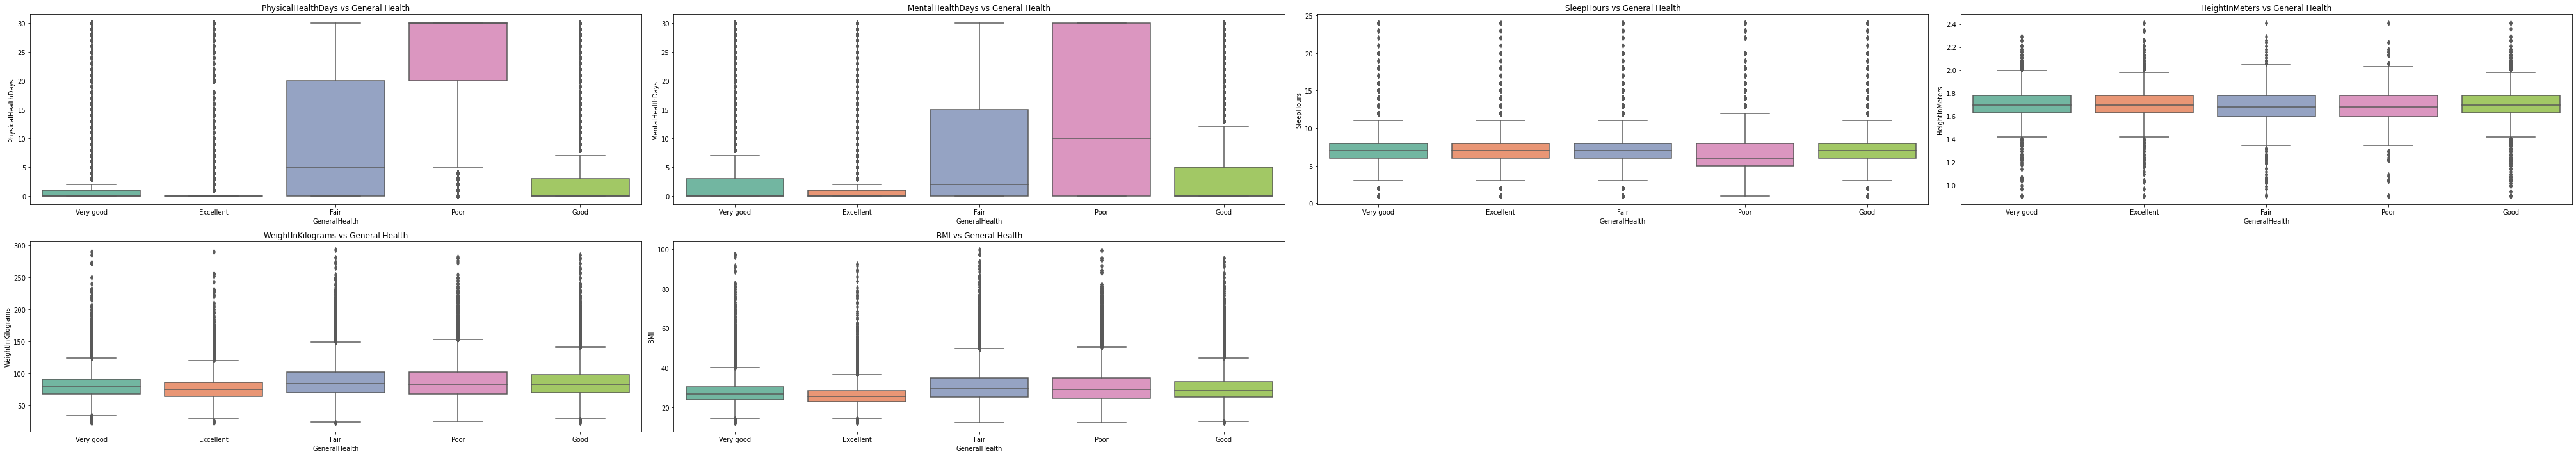

In [7]:
sns_plot(numerical_columns, data, "box")

### Violin Plots ###

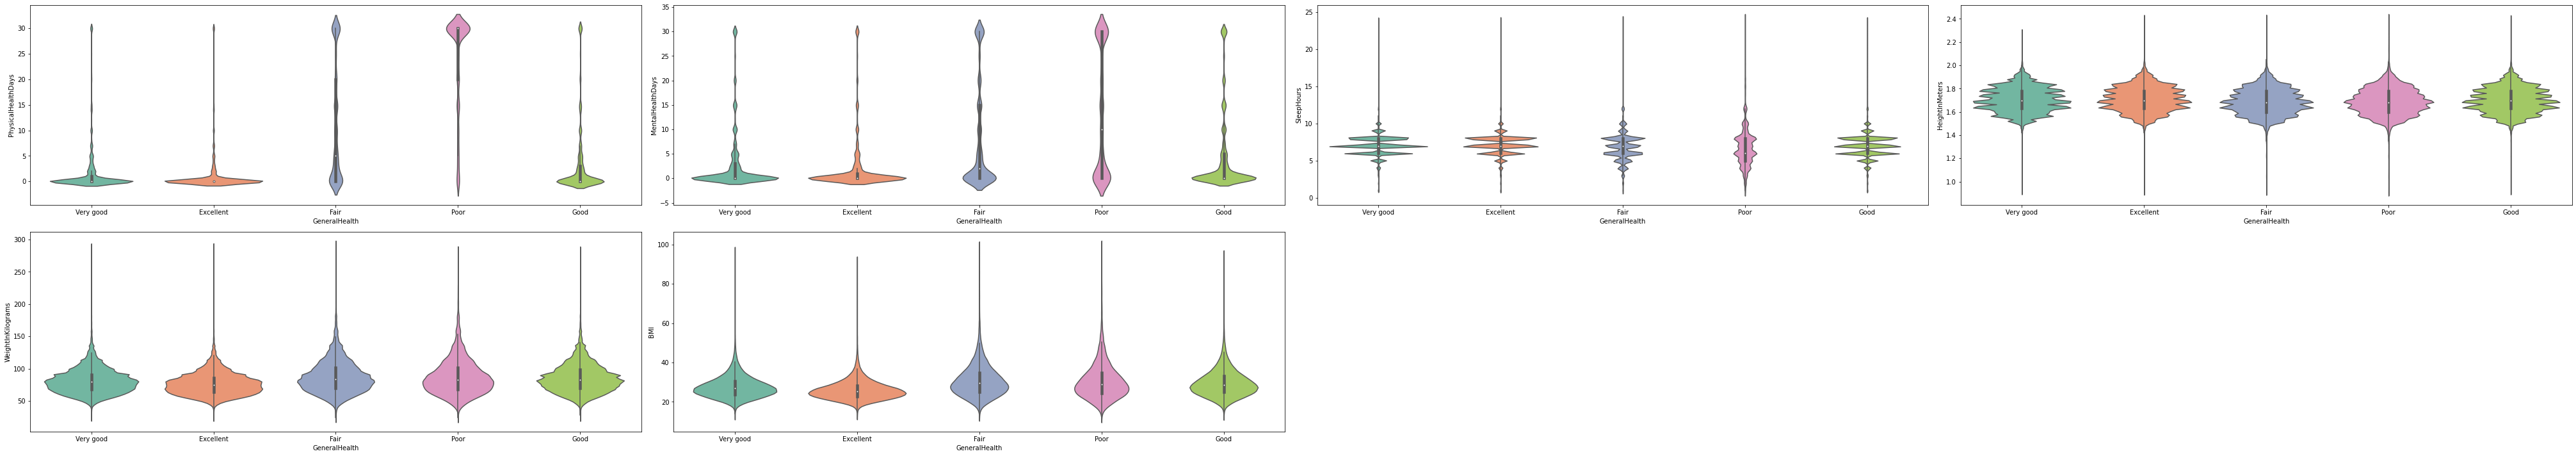

In [8]:
sns_plot(numerical_columns, data, "violin")

### Histogram ###

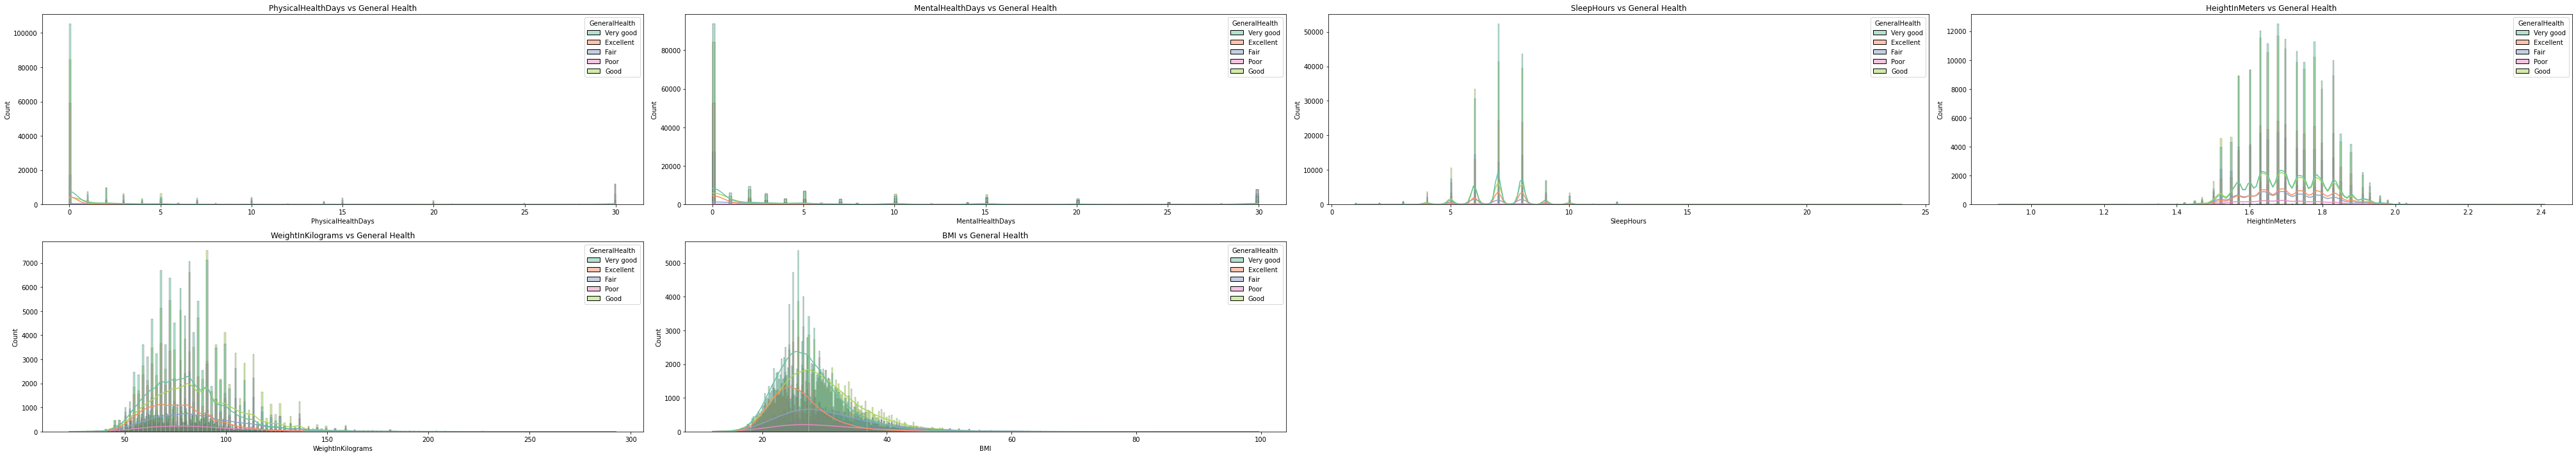

In [9]:
sns_plot(numerical_columns, data, "histogram")  

### Correlation Heatmap ###

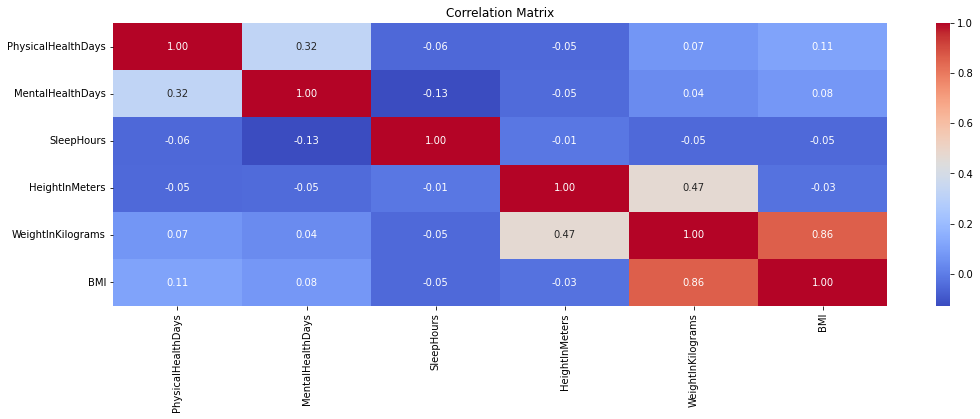

In [10]:
sns_plot(numerical_columns, data, "correlation")

### Compute Statistics ### 

In [11]:
compute_stats(numerical_columns,data)

Feature: PhysicalHealthDays
Mean: 4.347918609873217
Median: 0.0
Mode: 0.0
Standard Deviation: 8.688911998349095
Variance: 75.49719171505485
Minimum: 0.0
Maximum: 30.0
Skewness: 2.1798177556859795
Kurtosis: 3.4275892565111317


Feature: MentalHealthDays
Mean: 4.382649375666472
Median: 0.0
Mode: 0.0
Standard Deviation: 8.387474653346137
Variance: 70.3497310605239
Minimum: 0.0
Maximum: 30.0
Skewness: 2.1232157398806377
Kurtosis: 3.3592286031754877


Feature: SleepHours
Mean: 7.022982675997716
Median: 7.0
Mode: 7.0
Standard Deviation: 1.5024250128883112
Variance: 2.2572809193524423
Minimum: 1.0
Maximum: 24.0
Skewness: 0.7646024958102875
Kurtosis: 8.74116989043753


Feature: HeightInMeters
Mean: 1.702690573376873
Median: 1.7
Mode: 1.68
Standard Deviation: 0.1071774997388341
Variance: 0.011487016450267784
Minimum: 0.91
Maximum: 2.41
Skewness: 0.028899535213155535
Kurtosis: 0.182299349211811


Feature: WeightInKilograms
Mean: 83.07447039354527
Median: 80.74
Mode: 90.72
Standard Deviation: 21.

### QQ-Plot ###

In [12]:
# sns_plot(numerical_columns, data, "qq")

In [13]:
data.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

### Removing outliers ###

In [14]:
# Remove rows with heights less than 1 m and beyond 2.2 m
data = data[data['HeightInMeters']>=1]
data = data[data['HeightInMeters']<=2.2]

data = data[data['WeightInKilograms']>=10]
data = data[data['WeightInKilograms']<=270]

data = data[data['SleepHours']>=0]
data = data[data['SleepHours']<=20]
data.shape

(394291, 40)

In [15]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [16]:

for col in categorical_features:
    data[col].fillna(data[col].mode()[0],inplace=True)


### Removing NAN values ###

In [17]:

# Replace all NAN values in the numerical columns by their median
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)


In [18]:
print(data.isna().sum())    

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

### LOF ### 

In [19]:
# Remove outliers using LOF
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = lof.fit_predict(data[numerical_columns])
data2 = data[outliers == 1]
print("Shape of dataset = ",data2.shape)
data2.to_csv("dataset/heart_2022_cleaned.csv", index=False) 

Shape of dataset =  (354862, 40)


In [20]:
compute_stats(numerical_columns,data2)

Feature: PhysicalHealthDays
Mean: 4.394415293832532
Median: 0.0
Mode: 0.0
Standard Deviation: 8.666410352154566
Variance: 75.10666839193183
Minimum: 0.0
Maximum: 30.0
Skewness: 2.167221550724772
Kurtosis: 3.402994424919476


Feature: MentalHealthDays
Mean: 4.494516178119945
Median: 0.0
Mode: 0.0
Standard Deviation: 8.417058892989553
Variance: 70.84688040805452
Minimum: 0.0
Maximum: 30.0
Skewness: 2.0817471958718103
Kurtosis: 3.2019864540837473


Feature: SleepHours
Mean: 6.987524727922404
Median: 7.0
Mode: 7.0
Standard Deviation: 1.3351410260346128
Variance: 1.782601559400759
Minimum: 1.0
Maximum: 20.0
Skewness: 0.06111058150222372
Kurtosis: 3.768227590510632


Feature: HeightInMeters
Mean: 1.7050399028354684
Median: 1.7
Mode: 1.68
Standard Deviation: 0.10431241611265828
Variance: 0.01088108015526037
Minimum: 1.0
Maximum: 2.13
Skewness: 0.04418983897158588
Kurtosis: -0.2937414346573348


Feature: WeightInKilograms
Mean: 83.19602577903521
Median: 81.19
Mode: 90.72
Standard Deviation: 21

In [21]:
# print(len(data))
# data['TetanusLast10Tdap'].value_counts()


In [22]:
# data2['PhysicalHealthDays'].value_counts()

In [23]:
# data['PhysicalHealthDays'].value_counts()